In [2]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [3]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [4]:
import pandas as pd

message = pd.read_csv('../Data/SMSSpamCollection.txt',names=['label','message'],sep='\t')

In [5]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


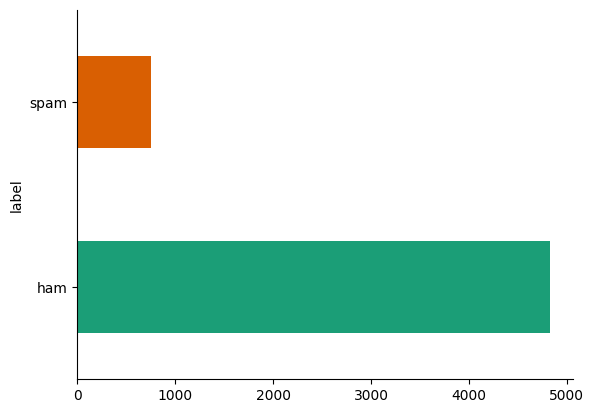

In [6]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
message.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
message['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/arjun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
corpus = []
for i in range(len(message)):
  review = re.sub('[^A-Za-z]',' ',message['message'][i])
  review = review.lower()
  review = review.split()
  words = [lemmatizer.lemmatize(word) for word in review]
  words = ' '.join(words)
  corpus.append(words)

In [11]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [12]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/arjun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
words = []
for sent in corpus:
  sent_token = sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

In [15]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [16]:
from tqdm import tqdm

In [17]:
word2vec_model = Word2Vec(words)

In [18]:
word2vec_model.wv.index_to_key

['to',
 'you',
 'the',
 'it',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'ur',
 'will',
 'if',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'day',
 'ok',
 'what',
 'free',
 'from',
 'all',
 'out',
 'know',
 'll',
 'come',
 'like',
 'time',
 'good',
 'am',
 'then',
 'got',
 'wa',
 'there',
 'he',
 'text',
 'love',
 'only',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'by',
 'going',
 'don',
 'stop',
 'home',
 'she',
 'about',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'our',
 'dont',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'they',
 'later',
 'please',
 'her',
 'pls',
 'ha',
 'any',
 'co',
 'did',
 'been',
 'msg',
 'min',
 'an',
 'some',
 'make',
 'night',
 'dear',
 'who',
 'here',
 'message',
 'well',
 'say',
 'where',
 're',
 'thing',
 'much',
 'grea

In [19]:
word2vec_model.corpus_count

5569

In [20]:
word2vec_model.epochs

5

In [21]:
word2vec_model.wv.similar_by_word('happy')

[('day', 0.9991120100021362),
 ('well', 0.9987905025482178),
 ('wish', 0.9987363815307617),
 ('my', 0.9987282156944275),
 ('hope', 0.9986262917518616),
 ('great', 0.9985179901123047),
 ('nice', 0.9985055923461914),
 ('dear', 0.9984885454177856),
 ('miss', 0.9984772801399231),
 ('good', 0.9984667897224426)]

In [22]:
# def avg_word2vec(doc):
#   return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key])

# X = []
# for i in tqdm(range(len(words))):
#   X.append(avg_word2vec(words[i]))


In [23]:
import numpy as np

In [24]:
def avg_word2vec(doc):
    vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Generate the list of average word2vec vectors for each document
X = [avg_word2vec(doc) for doc in tqdm(words)]

100%|██████████| 5569/5569 [00:00<00:00, 13910.02it/s]


Independant features

In [25]:
X

[array([-0.17834684,  0.2056806 ,  0.11073449,  0.06099732,  0.19284683,
        -0.43558127,  0.09219625,  0.5684922 , -0.2896541 , -0.04860722,
        -0.1623087 , -0.40979236,  0.00798323,  0.14238052,  0.21745332,
        -0.13188508,  0.01390454, -0.23529612, -0.03483199, -0.49977902,
         0.186824  ,  0.0960639 ,  0.17853473, -0.19302888, -0.02164371,
         0.13665827, -0.23419479, -0.20867641, -0.26305783,  0.00898144,
         0.34236065, -0.03186565,  0.21885164, -0.19039835, -0.12406882,
         0.40024358, -0.02051563, -0.1416084 , -0.07348421, -0.39484587,
         0.1308211 , -0.28049433, -0.20898066,  0.11839405,  0.09889611,
        -0.0408866 , -0.23345919, -0.04752494,  0.05346544,  0.1356852 ,
         0.19153728, -0.18410864, -0.07067959,  0.00194683, -0.1693499 ,
         0.06927527,  0.22802773,  0.03863328, -0.36848563,  0.11770014,
        -0.05628902,  0.17750202, -0.07177034, -0.04634101, -0.34946173,
         0.32485113,  0.16884658,  0.19140063, -0.3

In [26]:
len(X)

5569

In [27]:
X_new = np.array(X)

In [28]:
X_new.shape

(5569, 100)

In [29]:
X_new[1]

array([-0.15394634,  0.18535125,  0.09303386,  0.04572042,  0.17103431,
       -0.39202279,  0.08291449,  0.49599984, -0.24900512, -0.03848361,
       -0.14340943, -0.35016483,  0.00165596,  0.11871032,  0.19241902,
       -0.1255482 ,  0.01428584, -0.21138392, -0.03322758, -0.43267012,
        0.16753465,  0.0794004 ,  0.15960893, -0.1608865 , -0.01855772,
        0.11370754, -0.21103597, -0.19447416, -0.21903527,  0.01192029,
        0.30615115, -0.02442392,  0.18166818, -0.16160245, -0.10479776,
        0.34311721, -0.02618082, -0.12723896, -0.06022905, -0.34925199,
        0.12033289, -0.24977702, -0.17871395,  0.10893293,  0.07887825,
       -0.03089841, -0.20712265, -0.0376555 ,  0.04621282,  0.1209395 ,
        0.16422403, -0.16459082, -0.05256141,  0.01349688, -0.14312764,
        0.06831405,  0.20280465,  0.02590653, -0.3242996 ,  0.11580721,
       -0.03825823,  0.15415683, -0.05986259, -0.03403946, -0.31536692,
        0.28498468,  0.14293763,  0.16785629, -0.3164385 ,  0.35

In [30]:
y = message[list(map(lambda x: len(x)>0,corpus))]

In [31]:
y

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
y = pd.get_dummies(y['label'])

In [33]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [34]:
y = y.iloc[:,0].values

In [35]:
y

array([ True,  True, False, ...,  True,  True,  True])

In [36]:
y.shape

(5569,)

In [37]:
message.shape

(5572, 2)

In [38]:
df = pd.concat([pd.DataFrame(x.reshape(1, -1)) for x in X], ignore_index=True)

In [39]:
df.shape

(5569, 100)

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.178347,0.205681,0.110734,0.060997,0.192847,-0.435581,0.092196,0.568492,-0.289654,-0.048607,...,0.345642,0.142220,0.059402,0.080159,0.407776,0.273666,0.132686,-0.122906,0.072939,-0.058087
1,-0.153946,0.185351,0.093034,0.045720,0.171034,-0.392023,0.082914,0.496000,-0.249005,-0.038484,...,0.300038,0.111073,0.043137,0.071719,0.356890,0.238568,0.107049,-0.117278,0.065993,-0.045778
2,-0.165529,0.193941,0.124885,0.098435,0.209514,-0.477652,0.076887,0.614509,-0.321789,-0.040987,...,0.357525,0.163472,0.028526,0.079142,0.426748,0.271059,0.104418,-0.144196,0.070388,-0.054637
3,-0.240034,0.288440,0.141340,0.072046,0.248313,-0.587966,0.132395,0.753556,-0.384845,-0.066396,...,0.463897,0.178310,0.085427,0.114570,0.544977,0.373859,0.183217,-0.170705,0.099460,-0.073723
4,-0.211606,0.233107,0.127052,0.056884,0.219132,-0.496388,0.107216,0.648455,-0.329672,-0.063819,...,0.402622,0.147673,0.080828,0.097170,0.460322,0.320601,0.151486,-0.156361,0.087838,-0.061130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.197340,0.238170,0.148496,0.099757,0.250231,-0.539756,0.095665,0.706398,-0.366291,-0.055756,...,0.421375,0.191427,0.052931,0.092232,0.494369,0.320414,0.157930,-0.157422,0.085358,-0.053828
5565,-0.219843,0.234653,0.134115,0.079484,0.235224,-0.533257,0.108592,0.689417,-0.359661,-0.056968,...,0.425403,0.165293,0.059587,0.091349,0.485498,0.323604,0.138530,-0.172579,0.099848,-0.049089
5566,-0.240626,0.280814,0.148636,0.075783,0.238484,-0.575242,0.124070,0.751799,-0.372773,-0.074992,...,0.461058,0.189371,0.095741,0.108736,0.537261,0.368407,0.194261,-0.147228,0.101009,-0.082289
5567,-0.216719,0.245999,0.135486,0.076768,0.228839,-0.529842,0.109708,0.692444,-0.348539,-0.062758,...,0.418512,0.172026,0.082493,0.100002,0.494188,0.333083,0.159998,-0.149846,0.087207,-0.072646


In [41]:
df['output'] = y

In [42]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.178347,0.205681,0.110734,0.060997,0.192847,-0.435581,0.092196,0.568492,-0.289654,-0.048607,...,0.142220,0.059402,0.080159,0.407776,0.273666,0.132686,-0.122906,0.072939,-0.058087,True
1,-0.153946,0.185351,0.093034,0.045720,0.171034,-0.392023,0.082914,0.496000,-0.249005,-0.038484,...,0.111073,0.043137,0.071719,0.356890,0.238568,0.107049,-0.117278,0.065993,-0.045778,True
2,-0.165529,0.193941,0.124885,0.098435,0.209514,-0.477652,0.076887,0.614509,-0.321789,-0.040987,...,0.163472,0.028526,0.079142,0.426748,0.271059,0.104418,-0.144196,0.070388,-0.054637,False
3,-0.240034,0.288440,0.141340,0.072046,0.248313,-0.587966,0.132395,0.753556,-0.384845,-0.066396,...,0.178310,0.085427,0.114570,0.544977,0.373859,0.183217,-0.170705,0.099460,-0.073723,True
4,-0.211606,0.233107,0.127052,0.056884,0.219132,-0.496388,0.107216,0.648455,-0.329672,-0.063819,...,0.147673,0.080828,0.097170,0.460322,0.320601,0.151486,-0.156361,0.087838,-0.061130,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.197340,0.238170,0.148496,0.099757,0.250231,-0.539756,0.095665,0.706398,-0.366291,-0.055756,...,0.191427,0.052931,0.092232,0.494369,0.320414,0.157930,-0.157422,0.085358,-0.053828,False
5565,-0.219843,0.234653,0.134115,0.079484,0.235224,-0.533257,0.108592,0.689417,-0.359661,-0.056968,...,0.165293,0.059587,0.091349,0.485498,0.323604,0.138530,-0.172579,0.099848,-0.049089,True
5566,-0.240626,0.280814,0.148636,0.075783,0.238484,-0.575242,0.124070,0.751799,-0.372773,-0.074992,...,0.189371,0.095741,0.108736,0.537261,0.368407,0.194261,-0.147228,0.101009,-0.082289,True
5567,-0.216719,0.245999,0.135486,0.076768,0.228839,-0.529842,0.109708,0.692444,-0.348539,-0.062758,...,0.172026,0.082493,0.100002,0.494188,0.333083,0.159998,-0.149846,0.087207,-0.072646,True


In [43]:
## independent features
X = df.drop('output',axis=1)
## dependent features
y = df['output']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [45]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3918,-0.203274,0.267425,0.131358,0.069128,0.198497,-0.517047,0.132687,0.687000,-0.328286,-0.066542,...,0.405223,0.183449,0.112976,0.107291,0.504563,0.336647,0.208040,-0.101194,0.081058,-0.110308
3986,-0.164718,0.195046,0.125413,0.094692,0.209316,-0.470947,0.070560,0.608566,-0.312950,-0.042802,...,0.353501,0.167563,0.033682,0.078920,0.419002,0.266907,0.108850,-0.138993,0.071887,-0.054291
2758,-0.226239,0.261330,0.137179,0.078128,0.237039,-0.547721,0.113758,0.717547,-0.363307,-0.063335,...,0.441192,0.176449,0.070491,0.107694,0.512154,0.344981,0.168695,-0.152561,0.091863,-0.069229
4796,-0.200393,0.247650,0.152588,0.108711,0.254380,-0.572945,0.094531,0.741125,-0.381440,-0.054734,...,0.441319,0.191783,0.042620,0.094580,0.518248,0.321390,0.145560,-0.164853,0.081866,-0.064990
4503,-0.219269,0.239068,0.129656,0.059281,0.225331,-0.516558,0.109037,0.668947,-0.340958,-0.068041,...,0.413101,0.158638,0.077814,0.098935,0.474479,0.328403,0.158227,-0.157353,0.088896,-0.058801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.187334,0.209859,0.124136,0.073899,0.215046,-0.479008,0.085562,0.626449,-0.323631,-0.053479,...,0.383601,0.148584,0.045350,0.084511,0.435491,0.287456,0.121698,-0.148590,0.076630,-0.049274
5191,-0.236633,0.274171,0.144718,0.088666,0.262104,-0.591574,0.121312,0.766654,-0.385418,-0.056297,...,0.459940,0.186920,0.068396,0.101108,0.547720,0.366988,0.172973,-0.171215,0.099944,-0.079501
5226,-0.233070,0.264082,0.139818,0.073812,0.245572,-0.547461,0.116315,0.715598,-0.360859,-0.067197,...,0.441179,0.173122,0.080111,0.100622,0.512959,0.350546,0.170331,-0.159991,0.089982,-0.063091
5390,-0.252015,0.270749,0.140150,0.057241,0.248446,-0.563458,0.119199,0.734444,-0.368121,-0.074794,...,0.465824,0.168679,0.094569,0.109427,0.520760,0.372423,0.182307,-0.168743,0.099361,-0.074963


In [46]:
y_train

3918     True
3986    False
2758     True
4796    False
4503     True
        ...  
3772     True
5191     True
5226     True
5390     True
860      True
Name: output, Length: 4455, dtype: bool

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(accuracy_score(pred,y_test))

0.9766606822262118


In [49]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

       False       0.89      0.94      0.92       151
        True       0.99      0.98      0.99       963

    accuracy                           0.98      1114
   macro avg       0.94      0.96      0.95      1114
weighted avg       0.98      0.98      0.98      1114



In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[142   9]
 [ 17 946]]


plot graph

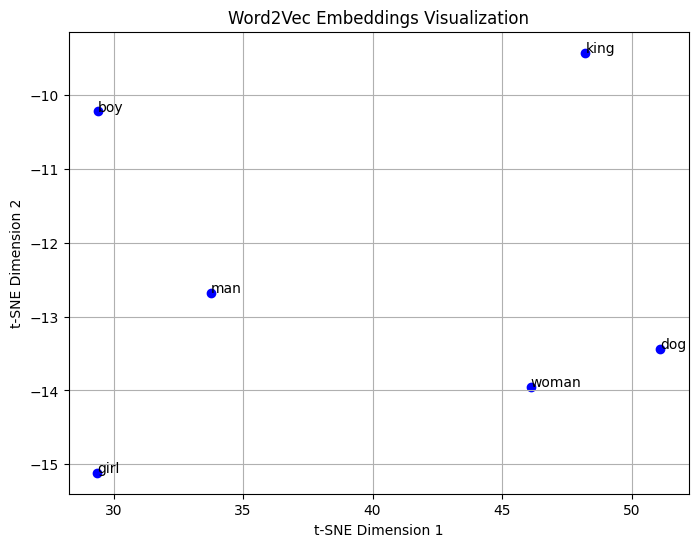

In [51]:
# A more selective model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get word vectors for a subset of words (adjust as needed)
words_of_interest = ["king", "man", "woman", "dog",'boy','girl']
word_vectors = np.array([word2vec_model.wv[word] for word in words_of_interest])

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2,perplexity=3, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker="o", color="b")

# Label the points
for i, word in enumerate(words_of_interest):
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=10)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Word2Vec Embeddings Visualization")
plt.grid(True)
plt.show()


In [52]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)


/home/arjun/Spam Detection end-end/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [53]:
print(accuracy_score(ada_preds,y_test))
print(accuracy_score(gb_preds,y_test))

0.9694793536804309
0.9712746858168761


In [59]:
print(ada.score(X_train,y_train))
print(gb.score(X_train,y_train))

0.9824915824915825
0.9851851851851852


/home/arjun/Spam Detection end-end/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arjun/Spam Detection end-end/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arjun/Spam Detection end-end/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arjun/Spam Detection end-end/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

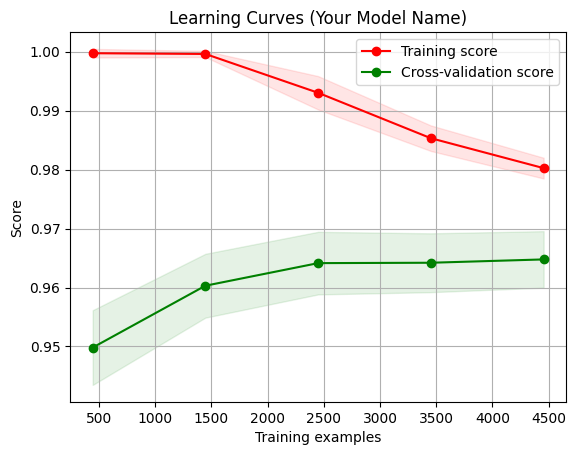

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Your Model Name)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = ada # Replace YourEstimator() with your estimator
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()


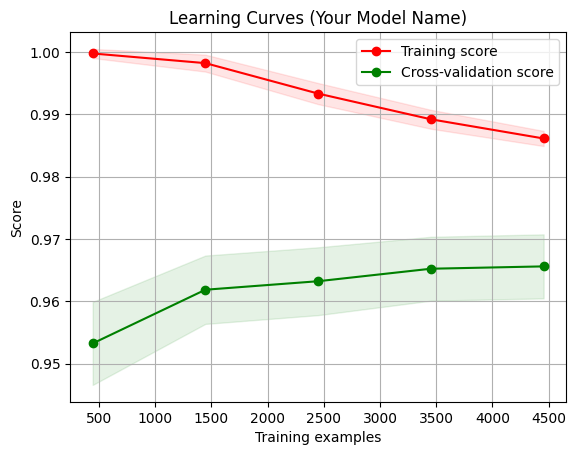

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Your Model Name)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = gb # Replace YourEstimator() with your estimator
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

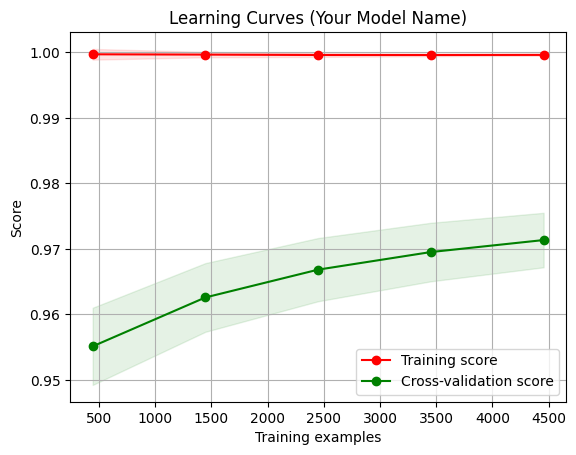

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Your Model Name)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = model # Replace YourEstimator() with your estimator
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()